# Data visualization

Our first topic is data visualization. 

Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.

We will focus on 2D visualization which means that there are two axes in each plot. 3D visualization is more complicated, but less clear than 2D visualization. However, many datasets have more than 3 features(columns). It is interesting to visualize high-dimensional data.

In [1]:
import sys
sys.version

'3.8.19 (default, Mar 20 2024, 15:00:34) \n[Clang 14.0.6 ]'

## Seaborn

Why do we use seaborn? It uses fascinating themes. A detailed comparison from GeeksforGeeks can be found [here]( https://www.geeksforgeeks.org/difference-between-matplotlib-vs-seaborn/).

Please check the official website ([seaborn](https://seaborn.pydata.org)) for more details.

#### Example 1: enable seaborn style.

Remark: we are still using matplotlib here, just enable seaborn style. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
y = 2*x + 4

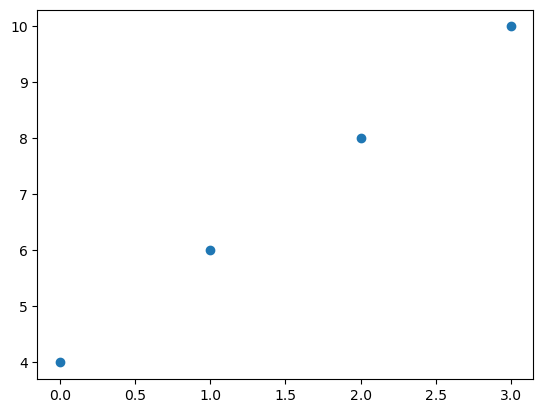

In [3]:
plt.scatter(x,y)
plt.show()

/var/folders/41/q3vqc_sx7xnbkn9vrss8ldqw0000gn/T/ipykernel_91667/3365458132.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


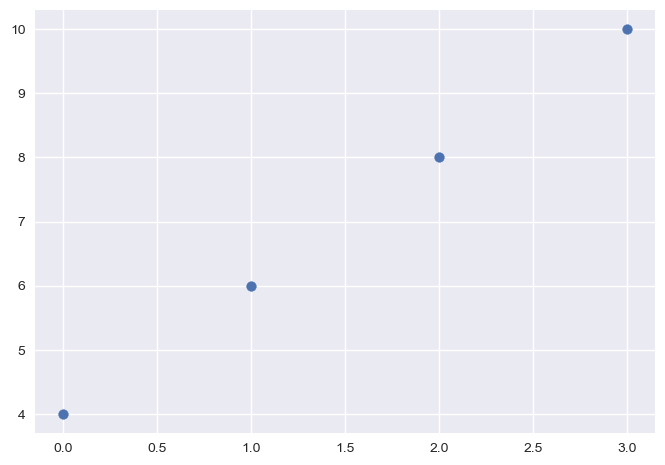

In [4]:
plt.style.use("seaborn")

plt.scatter(x,y)
plt.show()

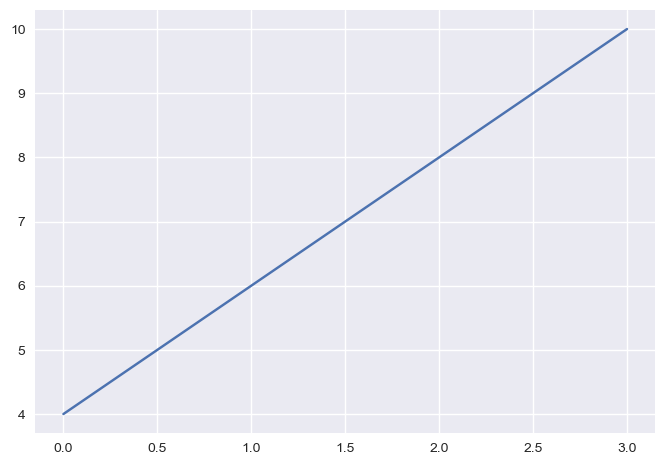

In [5]:
plt.plot(x,y)
plt.show()

Beautification is not the only advantages, seaborn acts as an important tool in picturing Linear Regression Models. In the following example, we use `seaborn.regplot` to visualize data points and regression line. Notice that it can be done by using matplotlib, but it is a little bit complicated.

#### Example 2: linear regression

In [6]:
import seaborn as sns

tips = sns.load_dataset("tips")

tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

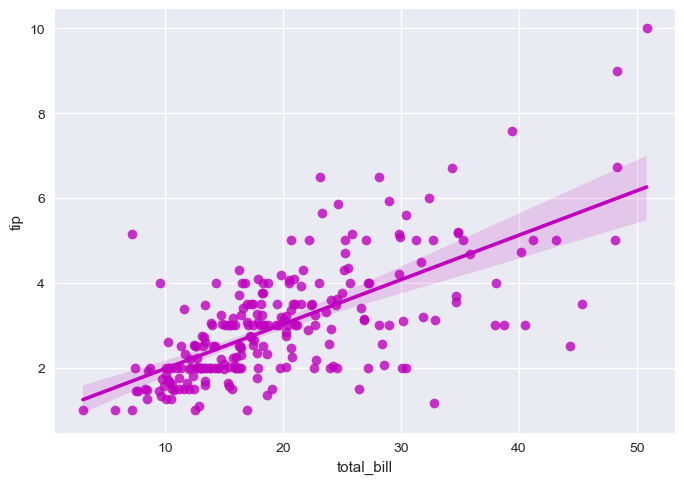

In [7]:
# use regplot to visualize data points and regression line
sns.regplot(x = "total_bill", y = "tip", data = tips, color = "m")

Moreover, we can also include marginal distributions

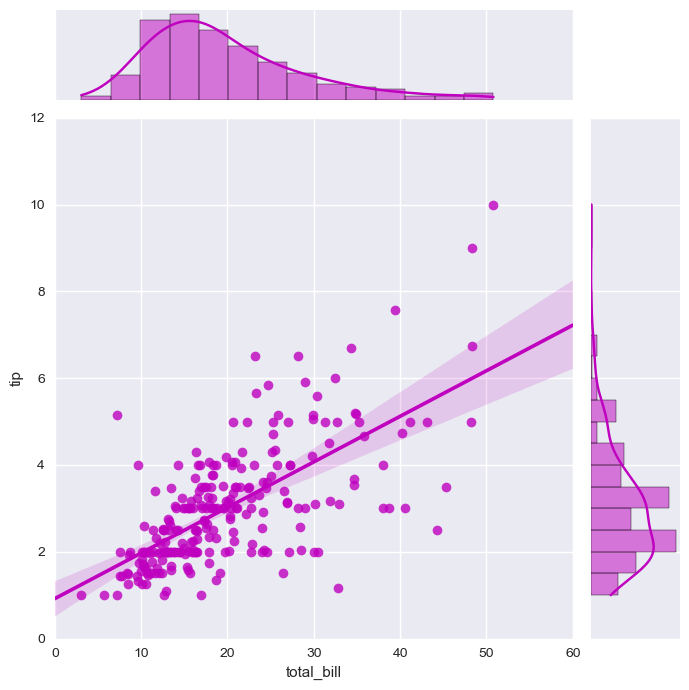

In [8]:
g = sns.jointplot(x = "total_bill", 
                  y = "tip", 
                  data = tips,
                  kind = "reg", 
                  truncate = False,
                  xlim = (0, 60), 
                  ylim = (0, 12),
                  color = "m", 
                  height = 7)

Let's use matplotlib to draw a similar plot

In [9]:
from sklearn.linear_model import LinearRegression

X = tips['total_bill'].to_numpy()
X = X.reshape((X.size, 1))
y = tips['tip'].to_numpy()

reg = LinearRegression().fit(X, y)

k = reg.coef_
b = reg.intercept_

print('Coefficient \n', k)
print('Intercept \n', b)

Coefficient 
 [0.10502452]
Intercept 
 0.9202696135546735


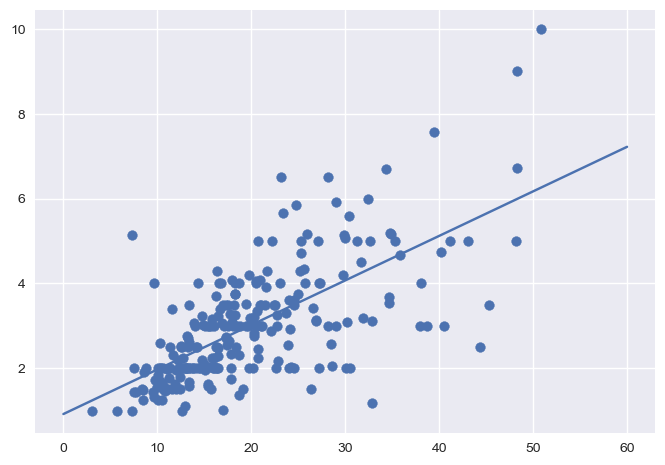

In [10]:
plt.scatter(X, y)

xx = np.linspace(0, 60, 100)
yy = k[0] * xx + b

plt.plot(xx, yy)
plt.show()

Above plot does not include confidence interval!!! Computing confidence interval is another hard statistical problem.

## Histogram

A histogram is a chart that plots the distribution of a numeric variable's values as a series of bars. Each bar typically covers a range of numeric values called a bin or class; a bar's height indicates the frequency of data points with a value within the corresponding bin.

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

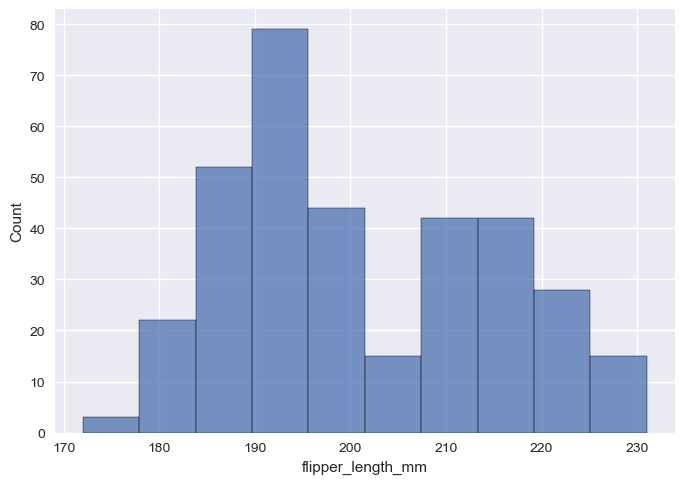

In [11]:
penguins = sns.load_dataset("penguins")

penguins

sns.histplot(data = penguins,
             x = 'flipper_length_mm')

We are able to change bins, binwidth, binrange, and color.

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

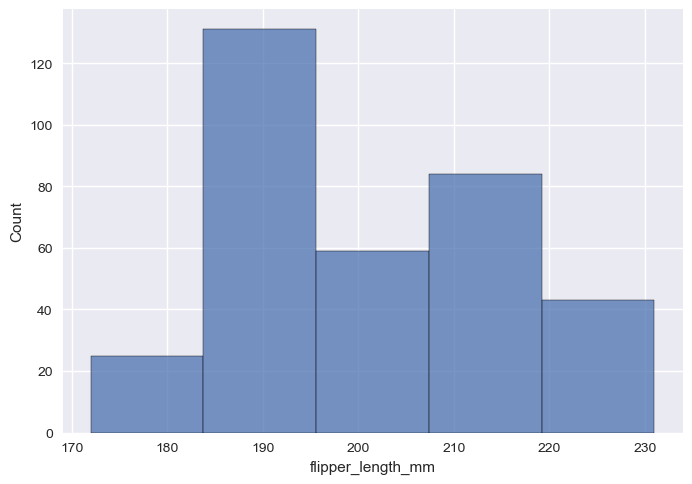

In [12]:
sns.histplot(data = penguins,
             x = 'flipper_length_mm', 
             bins = 5)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

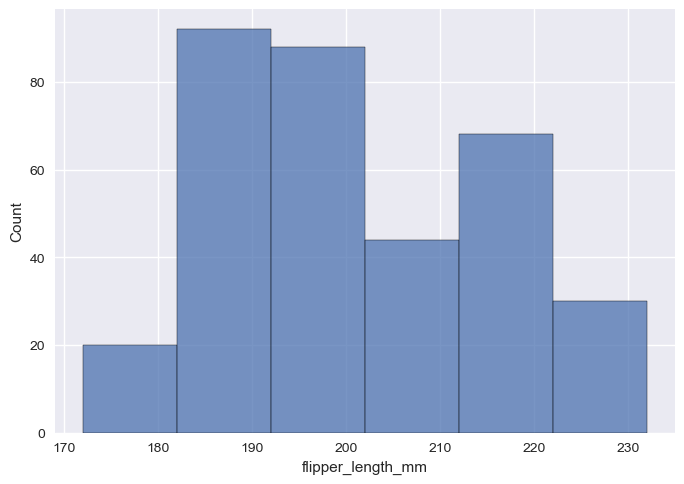

In [13]:
# can't use bins and binwidth at same time

sns.histplot(data = penguins,
             x = 'flipper_length_mm', 
             binwidth = 10)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

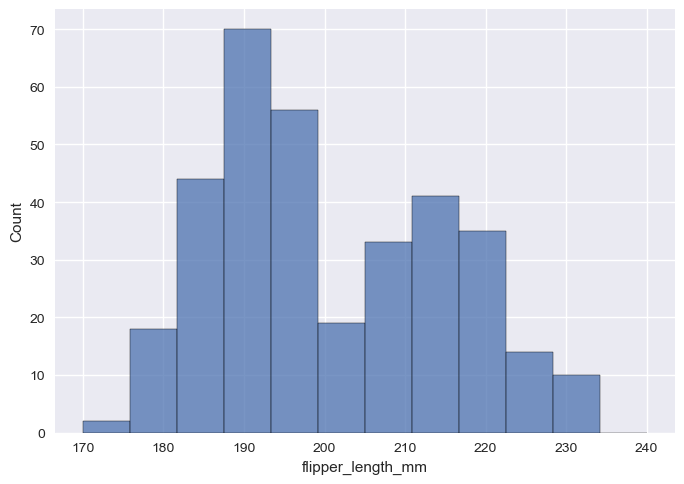

In [14]:
sns.histplot(data = penguins,
             x = 'flipper_length_mm', 
             binrange = [170, 240])

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

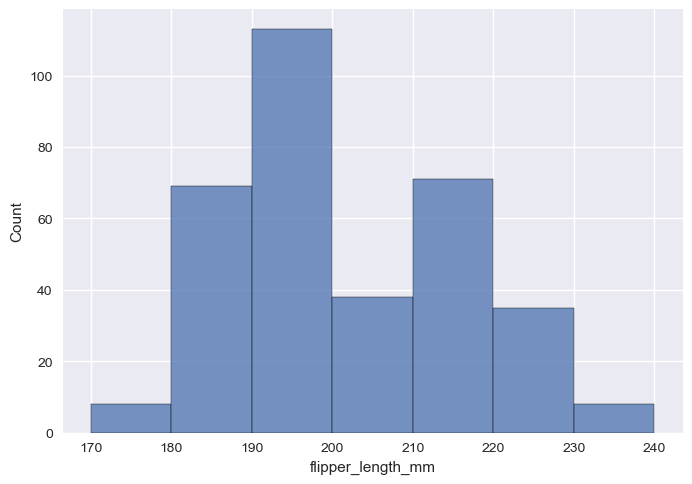

In [15]:
sns.histplot(data = penguins,
             x = 'flipper_length_mm', 
             binrange = [170, 240], 
             binwidth = 10)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

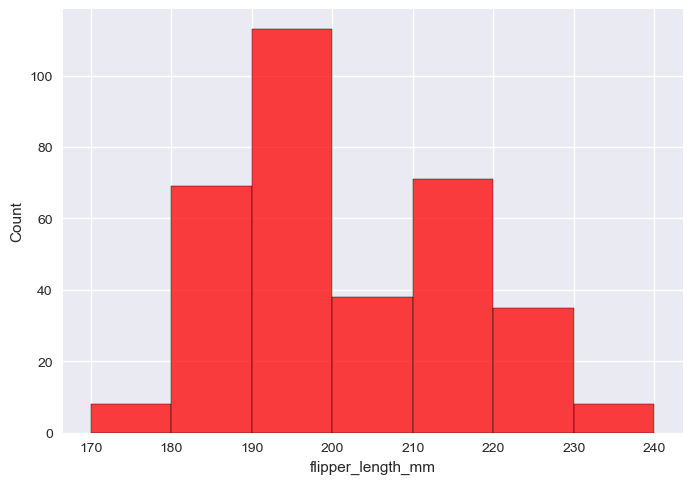

In [16]:
sns.histplot(data = penguins,
             x = 'flipper_length_mm', 
             binrange = [170, 240], 
             binwidth = 10,
             color = 'red')

Flip the plot by assigning the data variable to the y axis:

<Axes: xlabel='Count', ylabel='flipper_length_mm'>

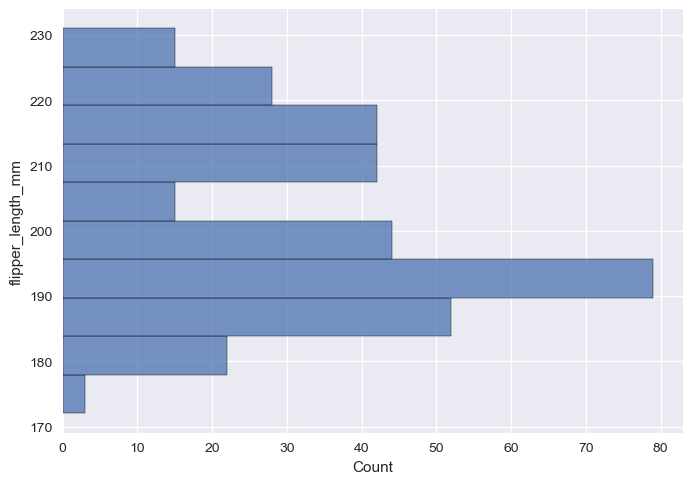

In [17]:
sns.histplot(data = penguins,
             y = 'flipper_length_mm')

Let's set title, change x(y)-label, and show values for histogram.

[Text(0, 0, '8'),
 Text(0, 0, '69'),
 Text(0, 0, '113'),
 Text(0, 0, '38'),
 Text(0, 0, '71'),
 Text(0, 0, '35'),
 Text(0, 0, '8')]

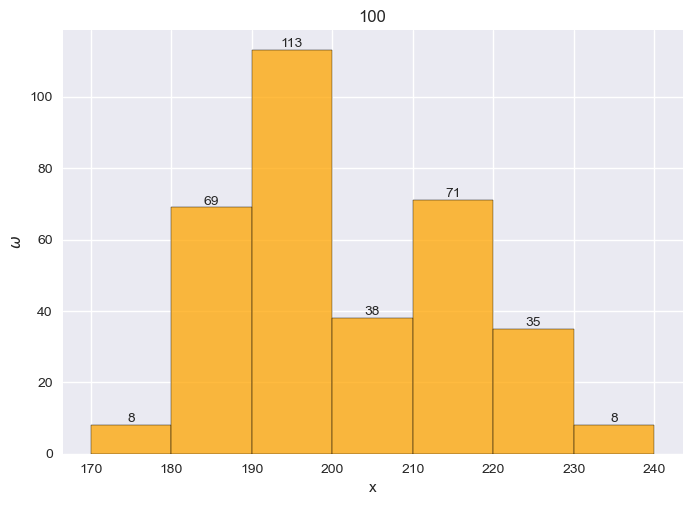

In [18]:
fig1 = sns.histplot(data = penguins,
                    x = 'flipper_length_mm',
                    binwidth = 10,
                    binrange = [170, 240],
                    color = 'orange')

# set title
# change x, y label

a = 100
fig1.set(xlabel = 'x', ylabel = r'$\omega$', title = f'{a}')

# add number to each bin

fig1.bar_label(fig1.containers[0])


In [19]:
# %pip list

In [20]:
fig1.containers[0]

<BarContainer object of 7 artists>

In [21]:
for i in fig1.containers[0]:
    
    print(i)

Rectangle(xy=(170, 0), width=10, height=8, angle=0)
Rectangle(xy=(180, 0), width=10, height=69, angle=0)
Rectangle(xy=(190, 0), width=10, height=113, angle=0)
Rectangle(xy=(200, 0), width=10, height=38, angle=0)
Rectangle(xy=(210, 0), width=10, height=71, angle=0)
Rectangle(xy=(220, 0), width=10, height=35, angle=0)
Rectangle(xy=(230, 0), width=10, height=8, angle=0)


## Bar plot

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

Question: What is the difference between histogram and bar plot?

<Axes: xlabel='island', ylabel='body_mass_g'>

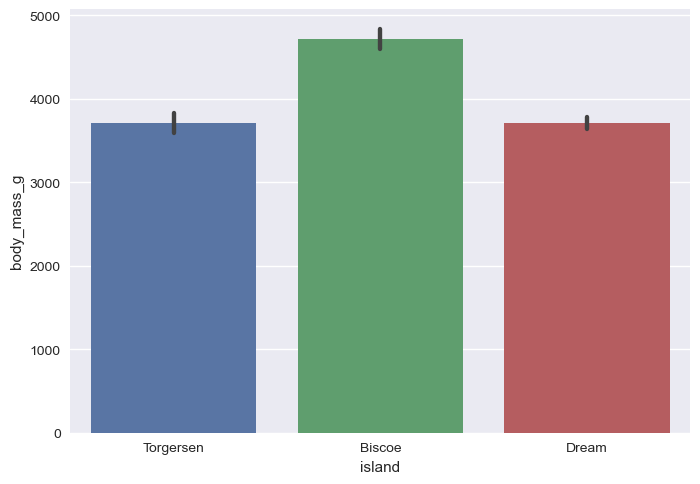

In [29]:
# recall our dataset penguins

sns.barplot(data = penguins, 
            x = "island", 
            y = 'body_mass_g')

By default, `seaborn.barplot` computes the mean of each categorical variable.

<Axes: xlabel='species', ylabel='body_mass_g'>

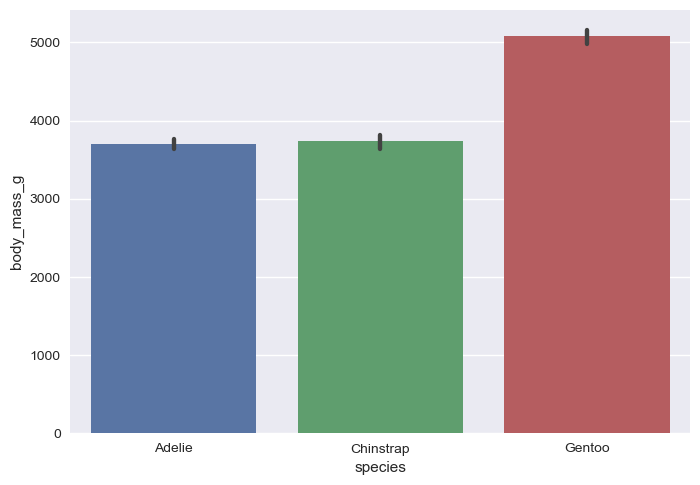

In [28]:
sns.barplot(data = penguins, 
            x = "species", 
            y = 'body_mass_g')

Text(0.5, 1.0, '2')

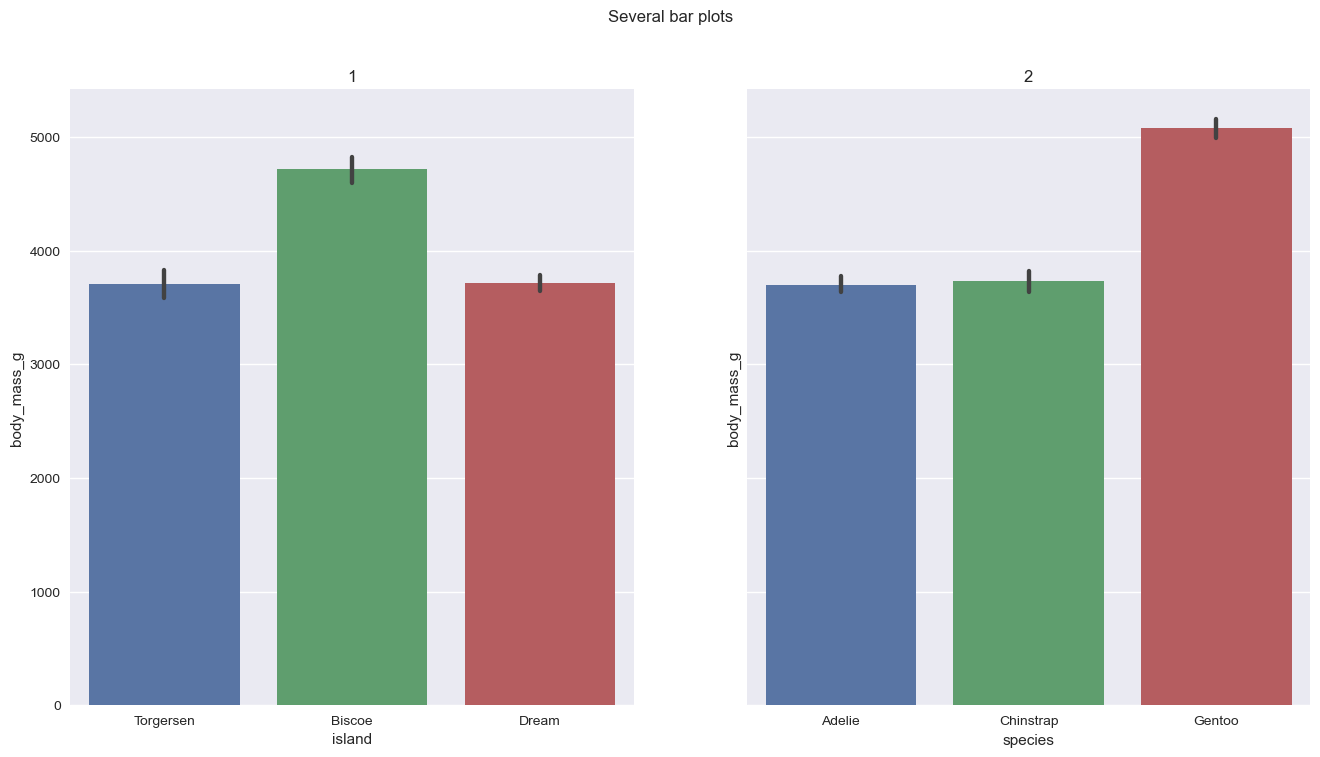

In [30]:
# subplot

fig, ax = plt.subplots(1, 2, sharey = True, figsize = (16, 8))
fig.suptitle('Several bar plots')

sns.barplot(data = penguins, 
            x = "island", 
            y = 'body_mass_g',
            ax = ax[0])
ax[0].set_title('1')

sns.barplot(data = penguins, 
            x = "species", 
            y = 'body_mass_g',
            ax = ax[1])
ax[1].set_title('2')

With long-form data, you can add a second layer of grouping with hue:

<Axes: xlabel='species', ylabel='body_mass_g'>

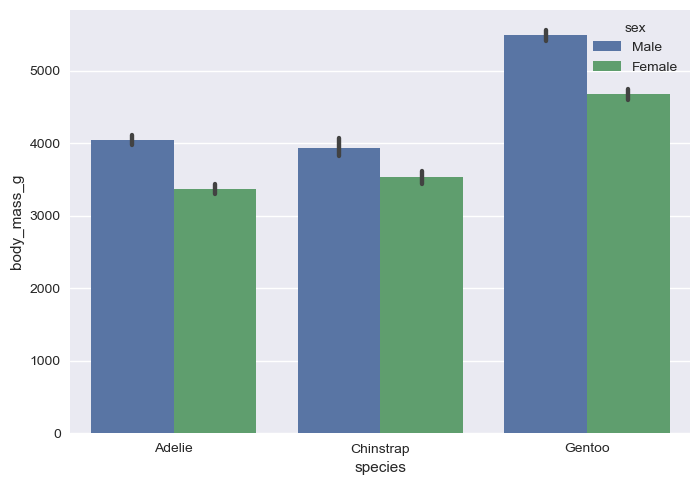

In [25]:
sns.barplot(data = penguins, 
            x = "species", 
            y = 'body_mass_g',
            hue = 'sex')

In [26]:
# Use `catplot()` to draw faceted bars, which is recommended over working directly with FacetGrid

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


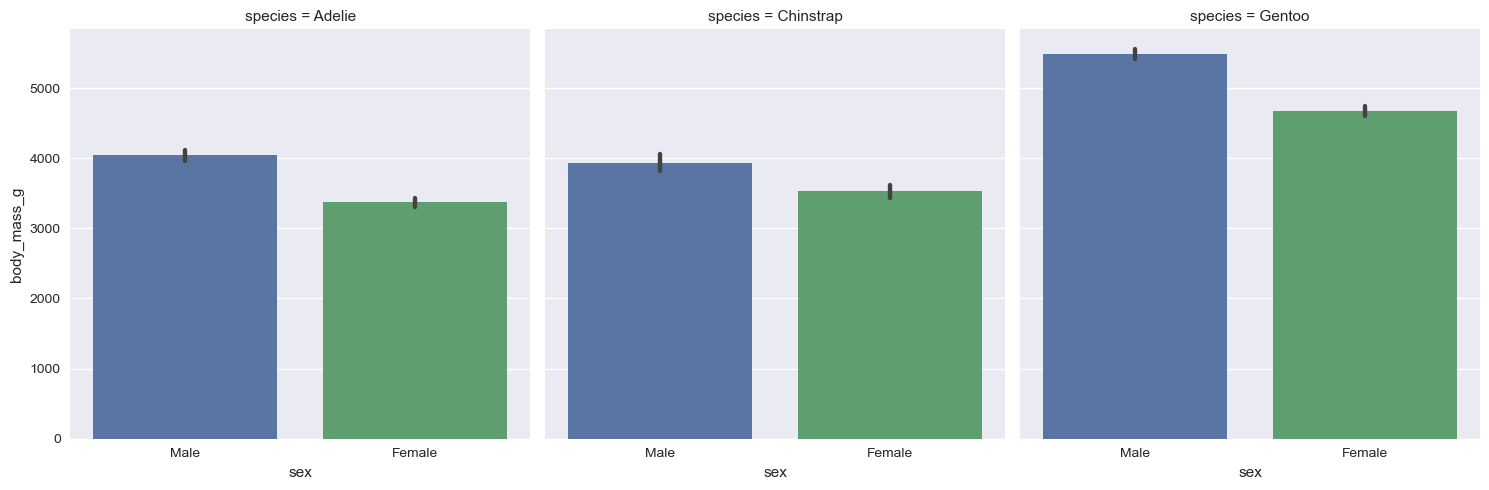

In [31]:
sns.catplot(penguins, 
            x = 'sex', 
            y = 'body_mass_g', 
            col = 'species', 
            kind = 'bar')

**Remark: adding title and labels is the same as before.**